In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
import torch
import os

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [35]:
def visualize_graph(G, color):
    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()


def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [3]:
from torch_geometric.datasets import KarateClub

In [4]:
dataset = KarateClub()

In [15]:
dataset
len(dataset)
dataset.num_classes
dataset.num_edge_features
dataset.num_node_features

dataset[0]
dataset[0].keys()

KarateClub()

1

4

0

34

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

['y', 'train_mask', 'x', 'edge_index']

In [14]:
dataset[0]['y']
dataset[0]['x']
dataset[0]['edge_index']

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

In [16]:
data = dataset[0]

In [23]:
data.num_nodes
data.num_edges
data.num_edges / data.num_nodes # avg node degree
data['train_mask'].sum()

34

156

4.588235294117647

tensor(4)

In [28]:
data
data['edge_index'].t()

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

In [29]:
from torch_geometric.utils import to_networkx

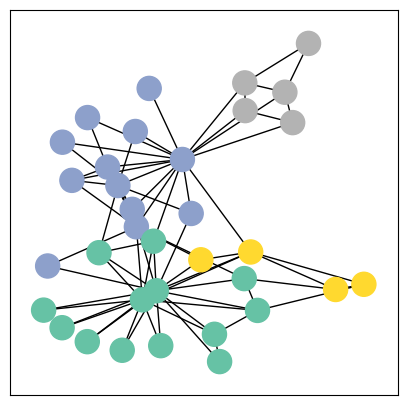

In [36]:
G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

### Implementing GNN

In [37]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [38]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(in_channels=dataset.num_features, out_channels=4)
        self.conv2 = GCNConv(in_channels=4, out_channels=4)
        self.conv3 = GCNConv(in_channels=4, out_channels=2)
        self.classifier = Linear(in_features=2, out_features=dataset.num_classes)
        
    def forward(self, x, edge_index):
        
        h = self.conv1(x, edge_index)
        h = h.tanh()
        
        h = self.conv2(h, edge_index)
        h = h.tanh()
        
        h = self.conv3(h, edge_index)
        h = h.tanh()
        
        out = self.classifier(h)
        
        return out, h
        
        

In [39]:
model = GCN()
model

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)

In [40]:
_,h = model(data['x'], data['edge_index'])

torch.Size([34, 2])

tensor([[ 0.0962,  0.0115],
        [ 0.0235,  0.0129],
        [ 0.0432,  0.0201],
        [ 0.0401,  0.0162],
        [ 0.0522, -0.0054]], grad_fn=<SliceBackward0>)

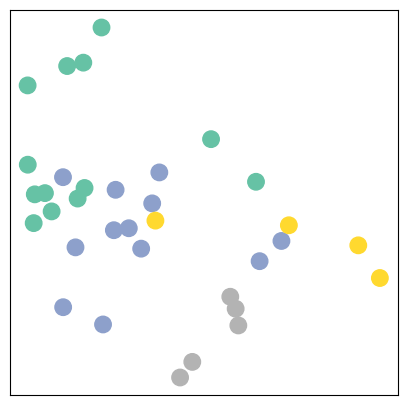

In [44]:
h.shape
h[:5]
visualize_embedding(h, data['y'])

In [45]:
model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.01)

In [47]:
_.shape

torch.Size([34, 4])

In [48]:
def train(data):
    optimizer.zero_grad()
    out, h = model(data['x'], data['edge_index'])
    loss = criterion(out[data['train_mask']], data['y'][data['train_mask']])
    loss.backward()
    optimizer.step()
    return loss, h

In [49]:
import time

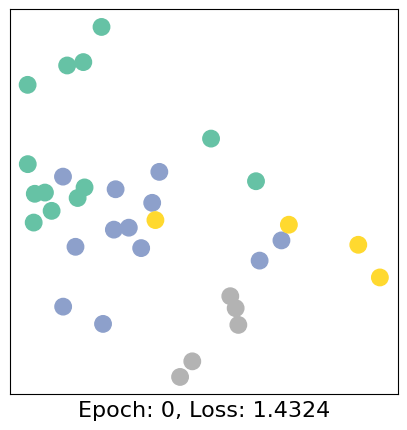

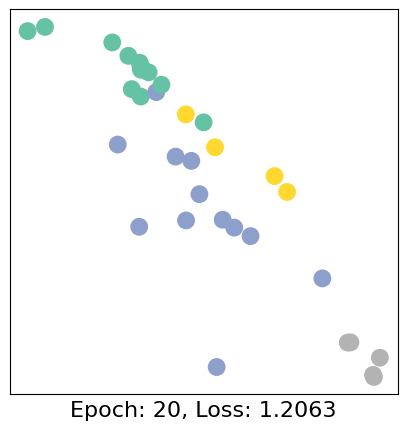

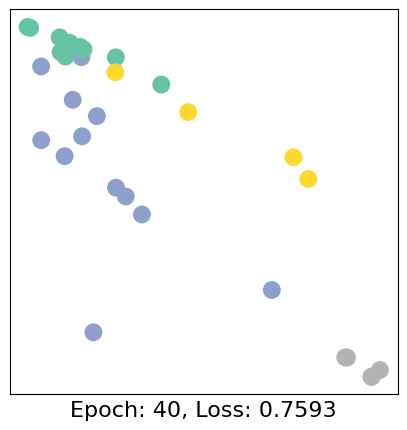

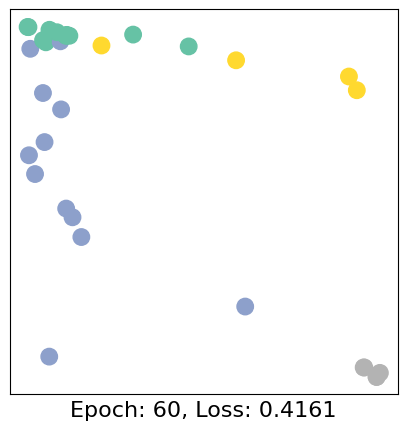

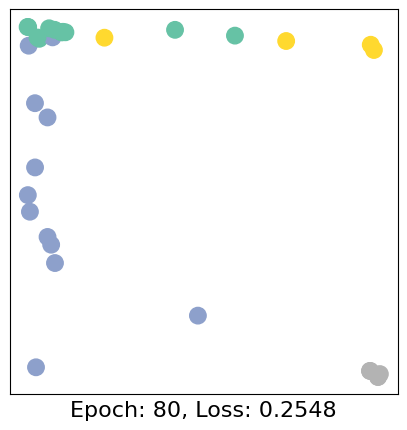

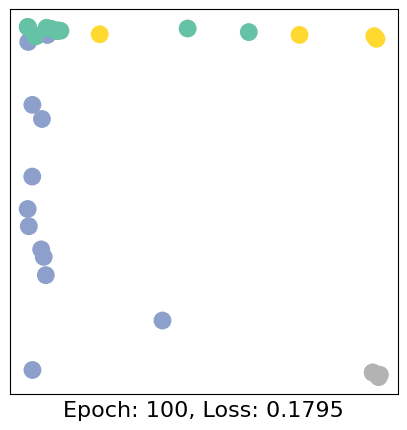

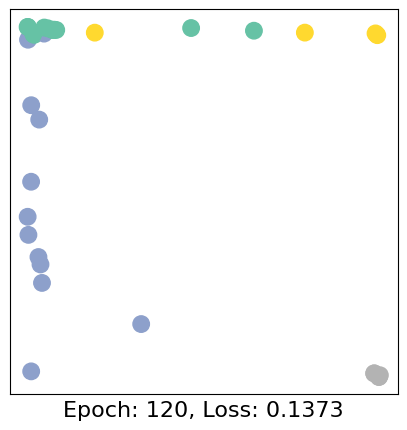

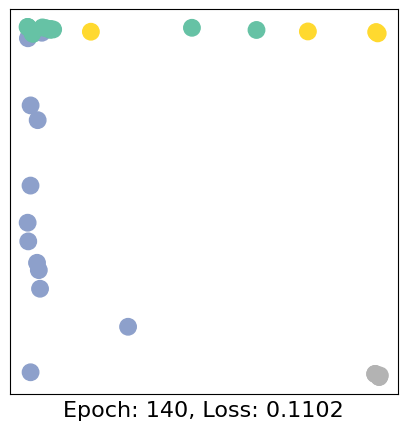

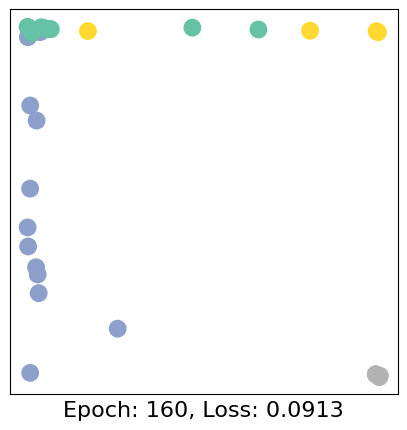

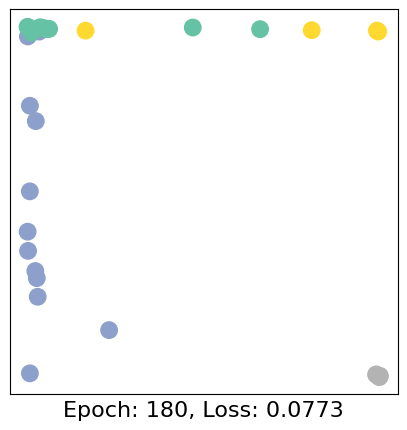

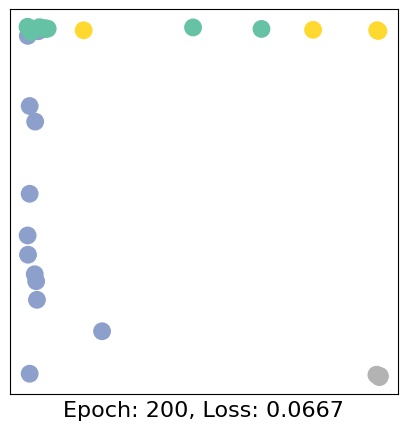

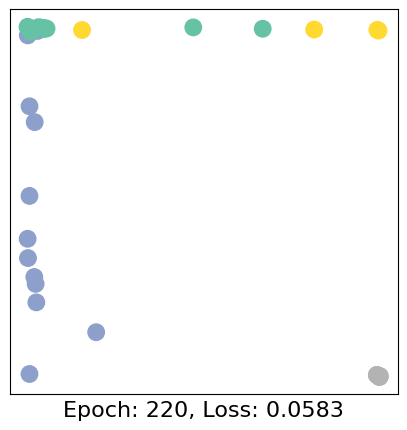

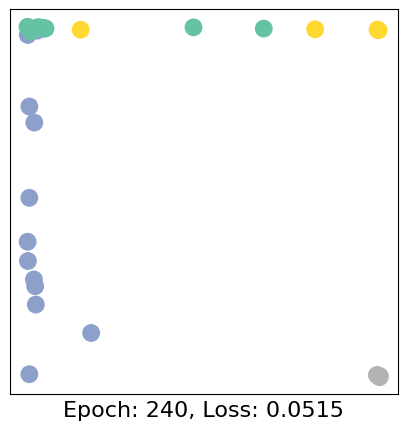

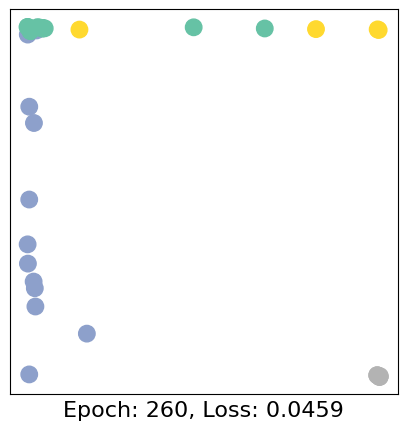

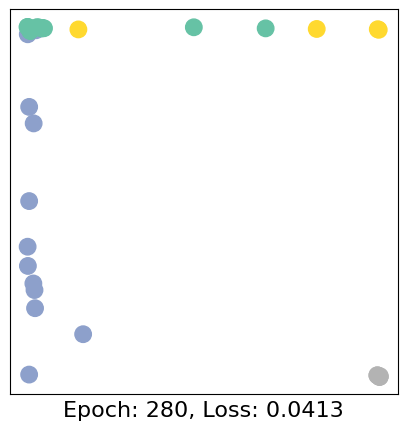

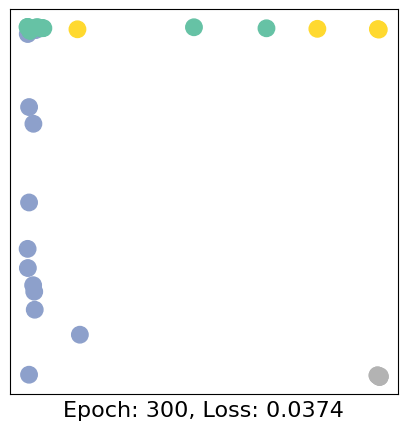

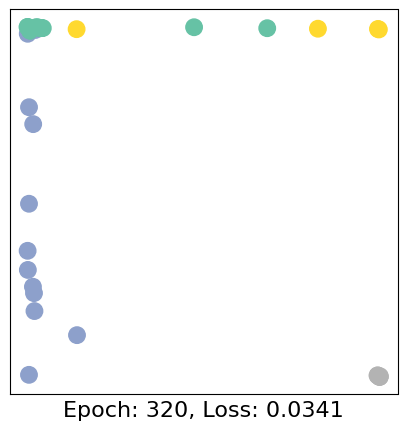

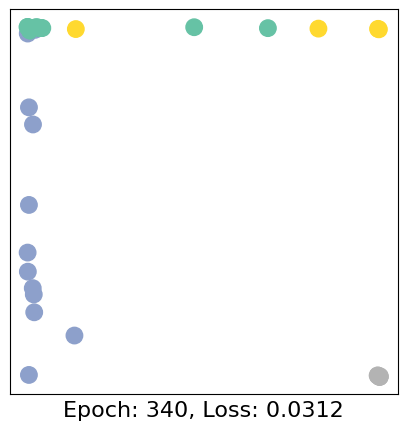

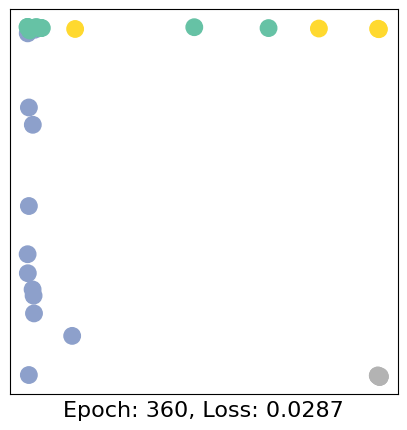

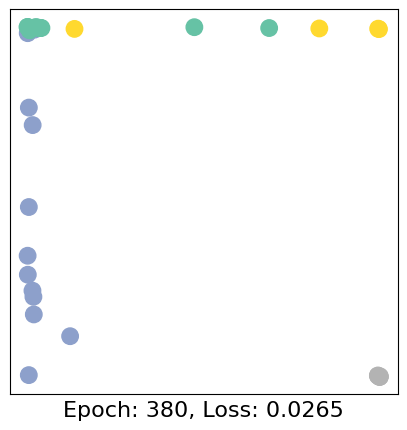

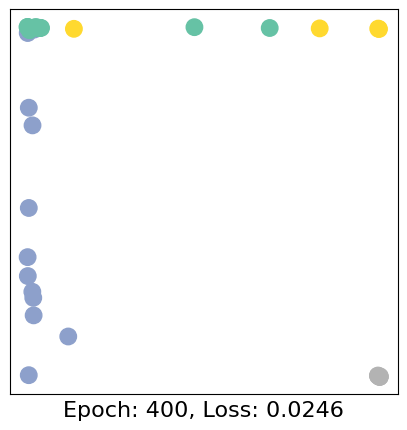

In [50]:
for epoch in range(401):
    loss , h = train(data)
    if epoch % 20 ==0:
        visualize_embedding(h, color=data['y'], epoch=epoch, loss = loss)
        time.sleep(0.3)